Simulating paging system...

Accessing Process 1, Page 0...
Step 1
Page fault: Page (1, 0) is not in memory.


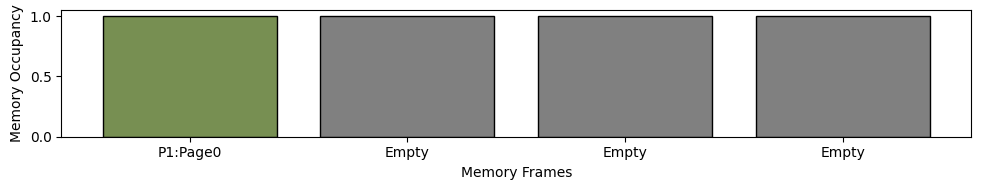

Accessing Process 1, Page 1...
Step 2
Page fault: Page (1, 1) is not in memory.


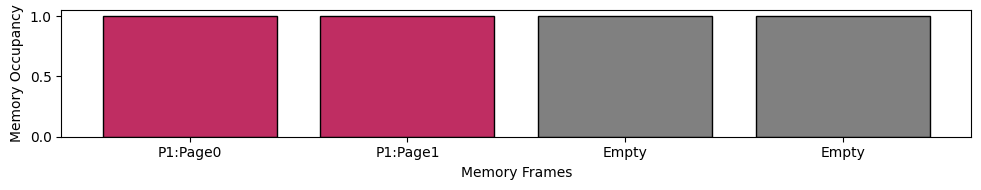

Accessing Process 2, Page 0...
Step 3
Page fault: Page (2, 0) is not in memory.


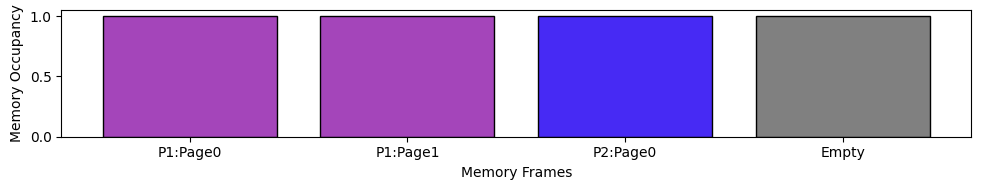

Accessing Process 3, Page 0...
Step 4
Page fault: Page (3, 0) is not in memory.


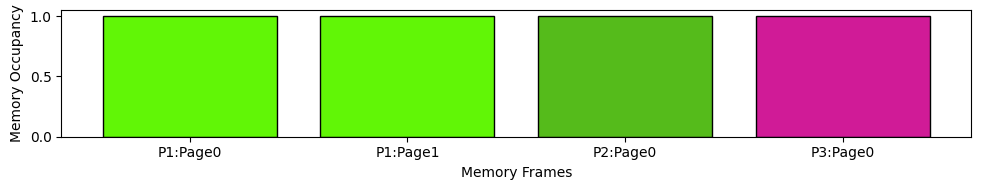

Accessing Process 4, Page 0...
Step 5
Page fault: Page (4, 0) is not in memory.
Replacing page P1:Page0 in Frame 0.


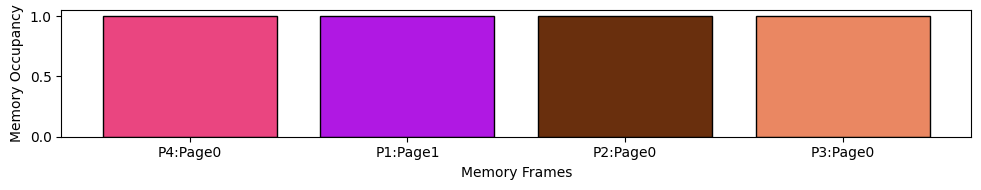

Accessing Process 1, Page 1...
Step 6
Page (1, 1) is already in memory (Frame 1).
Accessing Process 3, Page 1...
Step 7
Page fault: Page (3, 1) is not in memory.
Replacing page P1:Page1 in Frame 1.


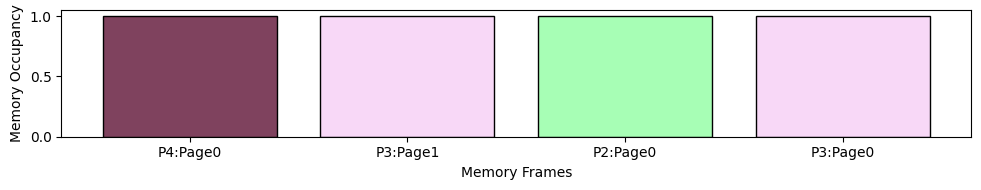

Accessing Process 3, Page 0...
Step 8
Page (3, 0) is already in memory (Frame 3).
Accessing Process 2, Page 0...
Step 9
Page (2, 0) is already in memory (Frame 2).

Physical Memory Frames:
     Frame   Content
0  Frame 0  P4:Page0
1  Frame 1  P3:Page1
2  Frame 2  P2:Page0
3  Frame 3  P3:Page0

Page Table:
   Process  Page  Frame
0        2     0      2
1        3     0      3
2        4     0      0
3        3     1      1
Total accesses: 9
Total Page Faults: 6

Total Page Faults: 6
Page Fault Rate: 66.67%


In [1]:
from typing import *
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ipynb.fs.full.pagination import PagingSystem

In [2]:
class TLB:
    """Class to represent the Translation Lookaside Buffer (TLB)."""
    
    def __init__(self, size: int):
        self.size = size
        self.cache = {}  # Maps virtual page to physical frame
        self.accesses = 0  # Number of TLB lookups
        self.hits = 0  # Number of TLB hits
    

    def lookup(self, virtual_page: int) -> int:
        """Lookup the virtual page in the TLB."""
        self.accesses += 1
        if virtual_page in self.cache:
            self.hits += 1
            return self.cache[virtual_page]
        return None

    def add_mapping(self, virtual_page: int, physical_frame: int):
        """Add a virtual-to-physical mapping to the TLB."""
        if len(self.cache) >= self.size:
            # Simulate eviction: remove the first item in the cache (FIFO)
            self.cache.pop(next(iter(self.cache)))
        self.cache[virtual_page] = physical_frame
    
    def hit_rate(self) -> float:
        """Calculate the TLB hit rate."""
        return self.hits / self.accesses if self.accesses > 0 else 0

In [3]:
class PagingSystemWithTLB(PagingSystem):
    """Paging System that uses TLB for address translation."""
    
    def __init__(self, num_frames, tlb_size: int):
        super().__init__(num_frames)
        self.tlb = TLB(tlb_size)  # TLB for faster lookups
        self.tlb_miss_penalty = 10  # Simulate a penalty for TLB misses
    
    def access_page(self, process_id, page_number):
        """Simulate accessing a page in memory with TLB."""
        
        # Check the TLB first for a virtual-to-physical translation
        physical_frame = self.tlb.lookup(page_number)
        
        if physical_frame is not None:
            print(f"TLB Hit: Virtual Page {page_number} -> Physical Frame {physical_frame}")
            return
        
        # TLB miss, now check the page table
        print(f"TLB Miss: Accessing Page {page_number}...")
        super().access_page(process_id, page_number)
        
        # After loading into memory, add to TLB
        if (process_id, page_number) in self.page_table:
            physical_frame = self.page_table[(process_id, page_number)]
            self.tlb.add_mapping(page_number, physical_frame)
    
    def display_performance(self):
        """Display TLB performance metrics."""
        print(f"\nTLB Hit Rate: {self.tlb.hit_rate() * 100:.2f}%")
        print(f"Total TLB Lookups: {self.tlb.accesses}")
        print(f"Total TLB Hits: {self.tlb.hits}")
        
        
    def simulate_accesses(self, accesses):
        """Simulate a sequence of page accesses with TLB and page table."""
        for process_id, page_number in accesses:
            self.access_page(process_id, page_number)
        
        # After all accesses, show the TLB performance
        self.display_performance()

TLB Miss: Accessing Page 0...
Page fault: Page (1, 0) is not in memory.


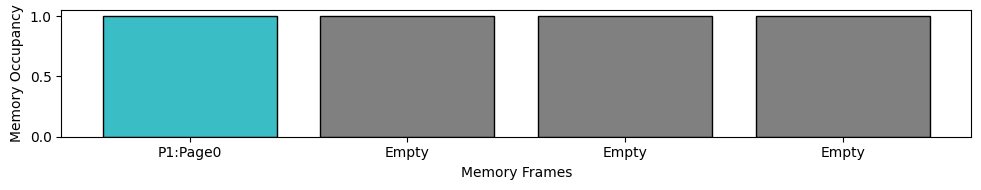

TLB Miss: Accessing Page 1...
Page fault: Page (1, 1) is not in memory.


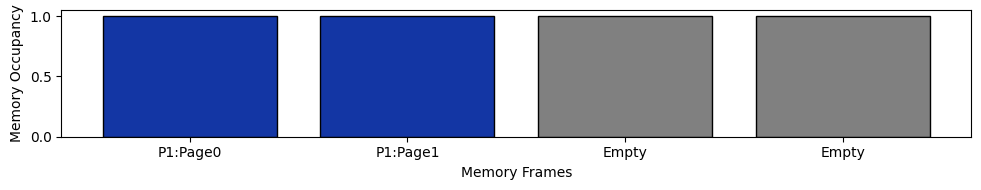

TLB Hit: Virtual Page 0 -> Physical Frame 0
TLB Hit: Virtual Page 0 -> Physical Frame 0
TLB Hit: Virtual Page 0 -> Physical Frame 0
TLB Hit: Virtual Page 1 -> Physical Frame 1
TLB Hit: Virtual Page 1 -> Physical Frame 1
TLB Hit: Virtual Page 0 -> Physical Frame 0
TLB Hit: Virtual Page 0 -> Physical Frame 0

TLB Hit Rate: 77.78%
Total TLB Lookups: 9
Total TLB Hits: 7

Simulating paging system without TLB:
Simulating paging system...

Accessing Process 1, Page 0...
Step 1
Page fault: Page (1, 0) is not in memory.


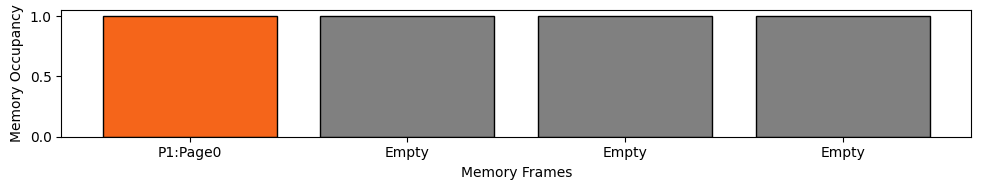

Accessing Process 1, Page 1...
Step 2
Page fault: Page (1, 1) is not in memory.


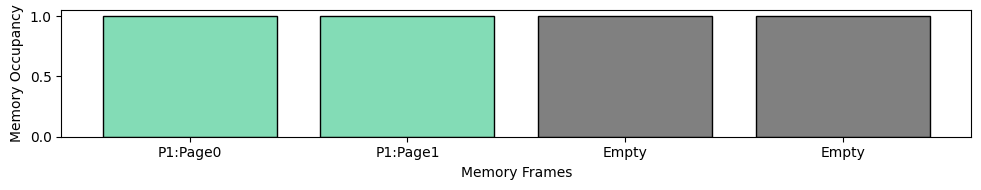

Accessing Process 2, Page 0...
Step 3
Page fault: Page (2, 0) is not in memory.


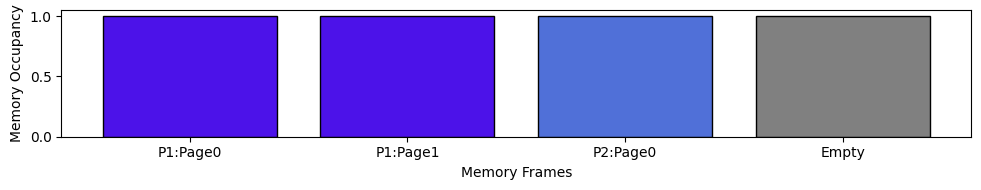

Accessing Process 3, Page 0...
Step 4
Page fault: Page (3, 0) is not in memory.


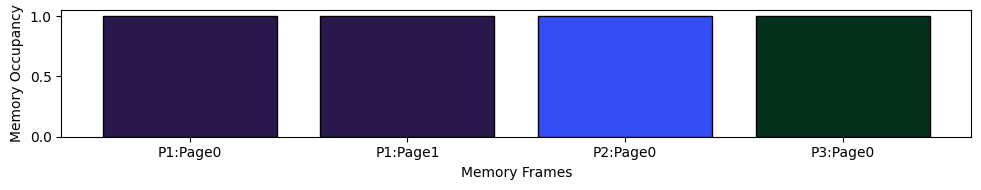

Accessing Process 4, Page 0...
Step 5
Page fault: Page (4, 0) is not in memory.
Replacing page P1:Page0 in Frame 0.


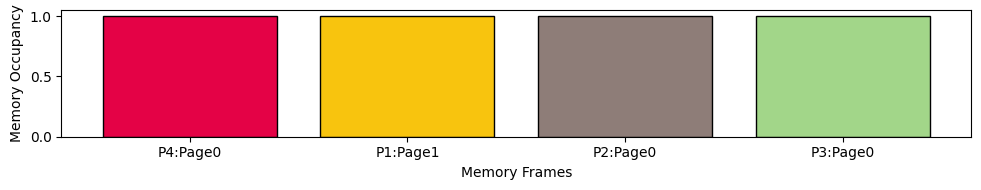

Accessing Process 1, Page 1...
Step 6
Page (1, 1) is already in memory (Frame 1).
Accessing Process 3, Page 1...
Step 7
Page fault: Page (3, 1) is not in memory.
Replacing page P1:Page1 in Frame 1.


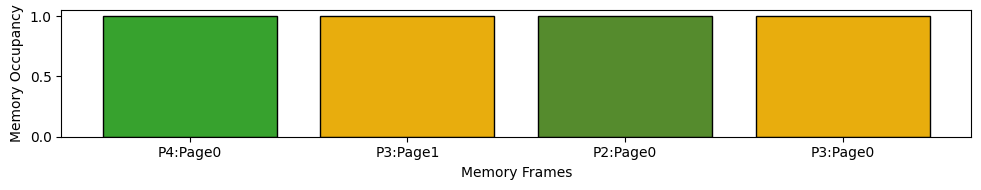

Accessing Process 3, Page 0...
Step 8
Page (3, 0) is already in memory (Frame 3).
Accessing Process 2, Page 0...
Step 9
Page (2, 0) is already in memory (Frame 2).

Physical Memory Frames:
     Frame   Content
0  Frame 0  P4:Page0
1  Frame 1  P3:Page1
2  Frame 2  P2:Page0
3  Frame 3  P3:Page0

Page Table:
   Process  Page  Frame
0        2     0      2
1        3     0      3
2        4     0      0
3        3     1      1
Total accesses: 9
Total Page Faults: 6

Total Page Faults: 6
Page Fault Rate: 66.67%


In [4]:
# Create a paging system with 4 frames and a TLB of size 3
paging_system_with_tlb = PagingSystemWithTLB(num_frames=4, tlb_size=3)

# Simulate memory accesses (same sequence as before)
accesses = [
    (1, 0), (1, 1), (2, 0), (3, 0),  # First 4 pages fill up the frames
    (4, 0),  # Page fault, FIFO replacement
    (1, 1),  # TLB hit
    (3, 1),  # TLB miss
    (3, 0),  # TLB hit
    (2, 0),  # TLB miss
]

# Run the simulation with TLB
paging_system_with_tlb.simulate_accesses(accesses)

# Run the simulation without TLB for comparison
print("\nSimulating paging system without TLB:")
paging_system_without_tlb = PagingSystem(num_frames=4)
paging_system_without_tlb.simulate_accesses(accesses)